In [26]:
from pandas_datareader import data
from arch import arch_model
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
start = datetime.datetime(2017,1,1)#获取数据的时间段-起始时间
end = datetime.date.today()#获取数据的时间段-结束时间
df = data.get_data_yahoo(['BTC-USD'], start=start, end=end)

In [16]:
df['log_ret'] = np.log(df['Close']/df['Close'].shift())# drop NaN values
df = df.dropna()
df

Attributes,Adj Close,Close,High,Low,Open,Volume,log_ret
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
Date,,,,,,,
2017-01-01,998.325012,998.325012,1003.080017,958.698975,963.658020,147775008,0.035254
2017-01-02,1021.750000,1021.750000,1031.390015,996.702026,998.617004,222184992,0.023193
2017-01-03,1043.839966,1043.839966,1044.079956,1021.599976,1021.599976,185168000,0.021389
2017-01-04,1154.729980,1154.729980,1159.420044,1044.400024,1044.400024,344945984,0.100960
2017-01-05,1013.380005,1013.380005,1191.099976,910.416992,1156.729980,510199008,-0.130575
...,...,...,...,...,...,...,...
2022-07-17,20779.343750,20779.343750,21600.640625,20778.179688,21195.041016,22927802083,-0.019585
2022-07-18,22485.689453,22485.689453,22633.033203,20781.912109,20781.912109,39974475562,0.078920


In [29]:
# Volatility Forecasting By EGARCH(1,1)
model_EGARCH = arch_model(df['log_ret'],vol='EGARCH' , p = 1 , o = 0 , q = 1)
fitted_EGARCH = model_EGARCH.fit(disp='off')
print(fitted_EGARCH.summary)
arch_model()


<bound method ARCHModelResult.summary of                      Constant Mean - EGARCH Model Results                     
Dep. Variable:                log_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                3663.06
Distribution:                  Normal   AIC:                          -7318.11
Method:            Maximum Likelihood   BIC:                          -7295.66
                                        No. Observations:                 2028
Date:                Thu, Jul 21 2022   Df Residuals:                     2027
Time:                        16:15:53   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.3

TypeError: arch_model() missing 1 required positional argument: 'y'

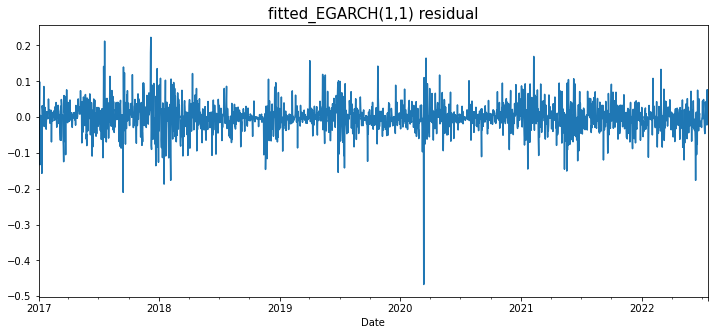

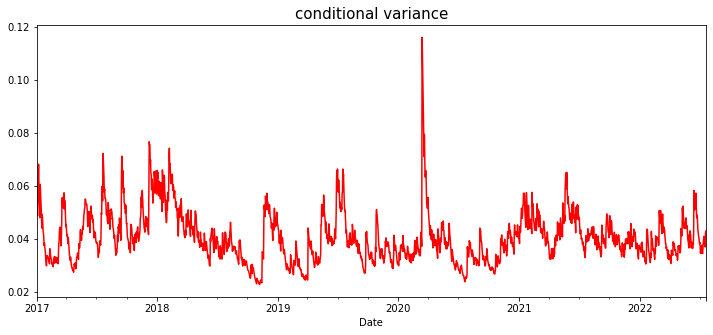

In [25]:
fitted_EGARCH.resid.plot(figsize=(12,5))
plt.title('fitted_EGARCH(1,1) residual',size=15)
plt.show()
fitted_EGARCH.conditional_volatility.plot(figsize=(12,5),color='r')
plt.title('conditional variance',size=15)
plt.show()

In [18]:

#---------------------------------------

# and finally, Forecasting step
# Note that as mentioned in `purpose` section, predict interval should be from '01-04-2015' to end of the data frame
horizon = len(df)
volatility_FORECASTED = fitted_EGARCH.forecast(horizon = horizon , method='simulation', reindex=False)